<a href="https://colab.research.google.com/github/juan-manuel124/ProyectoAnalisisDatos-TECH/blob/main/Proyecto_EnergiaSolarRisaraldaTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Información del Proyecto: Análisis de Datos Energéticos

---

## 📂 Fuentes de Datos Oficiales
* [Dirección obtención de Datos Nasa](https://power.larc.nasa.gov/data-access-viewer/)
* [Datos Abiertos Colombia - Proyectos Energéticos](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/data_preview)

---

## 👥 Equipo de Trabajo
| Rol          | Nombre                    | Correo de Contacto               |
|:-------------|:--------------------------|:---------------------------------|
| **Líder**    | Mónica Roncancio Restrepo | `monikroncancio@gmail.com`       |
| Responsable  | José Julián Ruiz Correa   | `julianruizc@gmail.com`          |
| Responsable  | Natalia Herrera Florez    | `datosnatalianalisis@gmail.com`  |
| Responsable  | Juan Manuel Betancourt    | `manolo310@gmail.com`            |

---

## 📌 Repositorio del Proyecto en GitHub
🔗 **[Acceder al Proyecto GitHub](https://github.com/juan-manuel124/ProyectoAnalisisDatos-TECH.git)**

In [250]:
# =====================================
# 📦 Importación de librerías necesarias
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

# =====================================
# 🌐 Fuente 1: GitHub (CSV en tu repositorio público)
# =====================================
print("🔽 Cargando datos desde datos.gov.co...")
url_datosgov = "https://www.datos.gov.co/api/views/vy9n-w6hc/rows.csv?accessType=DOWNLOAD"
# Corrected URL to raw data on GitHub
url_daraNasa = "https://raw.githubusercontent.com/juan-manuel124/ProyectoAnalisisDatos-TECH/main/POWER_Point_Daily_20221001_20250612_005d07N_075d96W_LST.csv"

# =====================================
# 📊 Función para mejorar la vista previa de los DataFrames
# =====================================
def vista_previa(df, nombre, num_filas=5):
    print(f"\n{'='*80}")
    print(f"📌 Vista previa de: {nombre}")
    print(f"🔸 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print('-'*80)
    display(df.head(num_filas))
    print('='*80)

# =====================================
# 🔽 Carga de datos
# =====================================
try:
    # Datos de proyectos energéticos
    print("🔽 Cargando datos desde datos.gov.co...")
    response = requests.get(url_datosgov)
    response.raise_for_status()
    data_dgov = pd.read_csv(StringIO(response.text), encoding='utf-8', on_bad_lines='skip')

    # Datos meteorológicos de NASA
    print("🔽 Cargando datos desde NASA...")
    response2 = requests.get(url_daraNasa)
    response2.raise_for_status()
    data_nasa = pd.read_csv(StringIO(response2.text), encoding='utf-8', skiprows=12)

    # Renombrar columnas a español
    data_nasa.rename(columns={
        'YEAR': 'AÑO',
        'MO': 'MES',
        'DY': 'DÍA',
        'ALLSKY_SFC_UV_INDEX': 'INDICE_UV',
        'ALLSKY_SFC_SW_DWN': 'RAD_SOLAR_DIRECTA',
        'ALLSKY_SFC_SW_DIFF': 'RAD_SOLAR_DIFUSA',
        'CDD18_3': 'GRADOS_DÍA_ENFRIAMIENTO'
    }, inplace=True)

    # Selección de columnas relevantes
    datos_uv_temp = data_nasa[['AÑO', 'MES', 'DÍA', 'INDICE_UV', 'GRADOS_DÍA_ENFRIAMIENTO']]

    # Filtrar por umbral
    umbral_uv = 5
    umbral_temp = 10
    datos_destacados = datos_uv_temp[
        (datos_uv_temp['INDICE_UV'] > umbral_uv) |
        (datos_uv_temp['GRADOS_DÍA_ENFRIAMIENTO'] > umbral_temp)
    ]

    print("✅ Datos cargados exitosamente")

except Exception as e:
    print(f"❌ Error al cargar datos: {e}")

# =====================================
# 👁️ Vista previa con nombres en español
# =====================================
try:
    vista_previa(data_dgov, "Proyectos Energéticos - datos.gov.co")
    vista_previa(data_nasa, "Datos Meteorológicos - NASA POWER")

    print("📌 Días con alta radiación UV o temperaturas elevadas:")
    columnas_radiacion = ['AÑO', 'MES', 'DÍA', 'RAD_SOLAR_DIRECTA', 'RAD_SOLAR_DIFUSA']
    vista_previa(data_nasa[columnas_radiacion], "📌 Radiación Solar (NASA POWER)")

    radiacion_alta = data_nasa[data_nasa['RAD_SOLAR_DIRECTA'] > 250]
    vista_previa(radiacion_alta, "🌞 Días con Alta Radiación Solar (>250 W/m²)")

    print("✅ Datos cargados y visualizados correctamente")
    data_nasa.info()

except Exception as e:
    print(f"⚠️ Error al mostrar la vista previa: {e}")

🔽 Cargando datos desde datos.gov.co...
🔽 Cargando datos desde datos.gov.co...
🔽 Cargando datos desde NASA...
✅ Datos cargados exitosamente

📌 Vista previa de: Proyectos Energéticos - datos.gov.co
🔸 Dimensiones: 158 filas × 13 columnas
--------------------------------------------------------------------------------


,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032



📌 Vista previa de: Datos Meteorológicos - NASA POWER
🔸 Dimensiones: 986 filas × 7 columnas
--------------------------------------------------------------------------------


,AÑO,MES,DÍA,INDICE_UV,RAD_SOLAR_DIRECTA,RAD_SOLAR_DIFUSA,GRADOS_DÍA_ENFRIAMIENTO
0,2022,10,1,1.65,153.32,110.89,2.75
1,2022,10,2,2.50,251.59,107.63,4.74
2,2022,10,3,3.06,269.56,91.18,4.51
3,2022,10,4,2.65,199.47,140.00,2.83
4,2022,10,5,2.81,198.99,127.51,2.63


📌 Días con alta radiación UV o temperaturas elevadas:

📌 Vista previa de: 📌 Radiación Solar (NASA POWER)
🔸 Dimensiones: 986 filas × 5 columnas
--------------------------------------------------------------------------------


,AÑO,MES,DÍA,RAD_SOLAR_DIRECTA,RAD_SOLAR_DIFUSA
0,2022,10,1,153.32,110.89
1,2022,10,2,251.59,107.63
2,2022,10,3,269.56,91.18
3,2022,10,4,199.47,140.00
4,2022,10,5,198.99,127.51



📌 Vista previa de: 🌞 Días con Alta Radiación Solar (>250 W/m²)
🔸 Dimensiones: 127 filas × 7 columnas
--------------------------------------------------------------------------------


,AÑO,MES,DÍA,INDICE_UV,RAD_SOLAR_DIRECTA,RAD_SOLAR_DIFUSA,GRADOS_DÍA_ENFRIAMIENTO
1,2022,10,2,2.50,251.59,107.63,4.74
2,2022,10,3,3.06,269.56,91.18,4.51
9,2022,10,10,3.09,260.98,97.57,2.66
116,2023,1,25,3.26,251.24,87.85,3.80
117,2023,1,26,3.39,261.92,85.47,4.02


✅ Datos cargados y visualizados correctamente
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AÑO                      986 non-null    int64  
 1   MES                      986 non-null    int64  
 2   DÍA                      986 non-null    int64  
 3   INDICE_UV                986 non-null    float64
 4   RAD_SOLAR_DIRECTA        986 non-null    float64
 5   RAD_SOLAR_DIFUSA         986 non-null    float64
 6   GRADOS_DÍA_ENFRIAMIENTO  986 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 54.1 KB


In [251]:
# =====================================
# 🧹 Limpieza y Conversión
# =====================================
DataEnergyGov = data_dgov.copy()

# Convertir columnas numéricas correctamente
columnas_numericas = [
    'Energía [kWh/día]',
    'Inversión estimada [COP]',
    'Empleos estimados',
    'Usuarios',
    'Emisiones CO2 [Ton/año]',
    'Capacidad'
]

for col in columnas_numericas:
    DataEnergyGov[col] = pd.to_numeric(DataEnergyGov[col], errors='coerce')

# Convertir fecha estimada
DataEnergyGov['Fecha estimada FPO'] = pd.to_datetime(DataEnergyGov['Fecha estimada FPO'], errors='coerce')

# Eliminar filas con fechas inválidas
DataEnergyGov.dropna(subset=['Fecha estimada FPO'], inplace=True)

# Crear columnas adicionales si es necesario
DataEnergyGov['AÑO'] = DataEnergyGov['Fecha estimada FPO'].dt.year
DataEnergyGov['MES'] = DataEnergyGov['Fecha estimada FPO'].dt.month

# =====================================
# 📊 Estadísticas descriptivas
# =====================================
print("\n📊 Estadísticas descriptivas - Inversión, Usuarios y Energía:")
print(DataEnergyGov[['Inversión estimada [COP]', 'Usuarios', 'Energía [kWh/día]']].describe())

print("\n🌿 Estadísticas - Emisiones y Empleos:")
print(DataEnergyGov[['Emisiones CO2 [Ton/año]', 'Empleos estimados']].describe())

# =====================================
# 🌞 Proyectos con alta generación de energía diaria
# =====================================
umbral_energia = 200000  # kWh/día
ProyectosAltaEnergia = DataEnergyGov[DataEnergyGov['Energía [kWh/día]'] > umbral_energia]

print(f"\n📌 Proyectos con energía > {umbral_energia:,} kWh/día: {ProyectosAltaEnergia.shape[0]} proyectos")
print(ProyectosAltaEnergia[['Proyecto', 'Departamento', 'Energía [kWh/día]', 'Usuarios']].head())

# =====================================
# 📅 Distribución por año
# =====================================
print("\n📆 Número de proyectos por año:")
print(DataEnergyGov['AÑO'].value_counts().sort_index())


📊 Estadísticas descriptivas - Inversión, Usuarios y Energía:
       Inversión estimada [COP]   Usuarios  Energía [kWh/día]
count                    155.00     155.00             155.00
mean         140,269,024,516.13  39,199.15         226,048.86
std          292,424,253,261.48  88,170.80         508,451.29
min                9,800,000.00       4.00              21.00
25%            8,815,000,000.00   1,852.00          10,680.00
50%           37,125,000,000.00   8,240.00          47,520.00
75%           85,570,000,000.00  18,221.00         105,072.00
max        2,625,000,000,000.00 582,659.00       3,360,000.00

🌿 Estadísticas - Emisiones y Empleos:
       Emisiones CO2 [Ton/año]  Empleos estimados
count                   155.00             155.00
mean                 66,006.29             211.80
std                 148,467.75             480.03
min                       6.00               0.00
25%                   3,119.00              15.50
50%                  13,876.00           

In [252]:
# =====================================
# 📊 MOSTRAR DATOS ELIMINADOS
# =====================================
def mostrar_datos_eliminados(df_original, df_procesado):
    """
    Muestra un análisis comparativo de los datos eliminados durante el procesamiento,
    incluyendo la causa de eliminación y ejemplos representativos.
    """
    if df_original is None or df_procesado is None:
        print("⚠️ No se pueden comparar DataFrames nulos")
        return None

    # Asegurar que exista la columna de fecha en ambos
    if 'fecha' not in df_original.columns:
        df_original = df_original.copy()
        df_original['fecha'] = pd.to_datetime(
            df_original[['AÑO', 'MES', 'DÍA']].astype(str).agg('-'.join, axis=1),
            errors='coerce'
        )

    # Detectar filas eliminadas por comparación de índice y fecha
    eliminados = df_original[~df_original.index.isin(df_procesado.index)].copy()

    if eliminados.empty:
        print("✅ No se eliminaron filas durante el procesamiento")
        return None

    print(f"\n{'='*80}")
    print(f"🧹 ANÁLISIS DE DATOS ELIMINADOS ({len(eliminados)} filas)")
    print('='*80)

    cols_num = ['INDICE_UV', 'RAD_SOLAR_DIRECTA', 'RAD_SOLAR_DIFUSA', 'GRADOS_DÍA_ENFRIAMIENTO']
    eliminados['Motivo'] = ''

    # Clasificación por causa (en orden de prioridad)
    eliminados.loc[eliminados[cols_num].isna().any(axis=1), 'Motivo'] = 'Valores faltantes'
    eliminados.loc[pd.isna(eliminados['fecha']), 'Motivo'] = 'Fecha inválida'
    eliminados.loc[eliminados['RAD_SOLAR_DIRECTA'] <= 0, 'Motivo'] = 'Radiación no positiva'

    # Si hay múltiples causas, deja la primera encontrada
    eliminados['Motivo'] = eliminados['Motivo'].replace('', 'Desconocida')

    # 🔸 Estadísticas por motivo
    resumen = eliminados['Motivo'].value_counts().reset_index()
    resumen.columns = ['Razón', 'Cantidad']
    resumen['% del Total'] = (resumen['Cantidad'] / len(eliminados)) * 100

    print("\n📋 RESUMEN DE ELIMINACIONES:")
    display(resumen.style.format({'% del Total': '{:.1f}%'}))

    # 🔍 Mostrar ejemplos representativos por tipo de eliminación
    print("\n🔍 EJEMPLOS DETALLADOS:")
    for i, razon in enumerate(resumen['Razón'], 1):
        muestra = eliminados[eliminados['Motivo'] == razon].head(1)
        print(f"\n{i}. {razon}:")
        print(f"Cantidad: {len(eliminados[eliminados['Motivo'] == razon])} filas")
        display(muestra.style.set_caption(f"Ejemplo de {razon.lower()}"))

    return eliminados
# =====================================
# 📊 PROCESAR DATOS EXPLORATORIA
# =====================================
def procesar_datos_nasa(df_original):
    """
    Limpieza y transformación robusta del dataset NASA con:
    - Validación de columnas
    - Manejo de valores faltantes
    - Conversión de tipos de datos
    - Generación de fechas
    - Filtrado por valores diurnos: RAD_SOLAR_DIRECTA > 0
    - Retorno de columnas clave solamente
    """
    try:
        if df_original is None or df_original.empty:
            print("⚠️ Dataset vacío o no proporcionado")
            return None

        df = df_original.copy()

        columnas_clave = ['AÑO', 'MES', 'DÍA',
                          'INDICE_UV', 'RAD_SOLAR_DIRECTA',
                          'RAD_SOLAR_DIFUSA', 'GRADOS_DÍA_ENFRIAMIENTO']

        # Verificar columnas requeridas
        faltantes = [col for col in columnas_clave if col not in df.columns]
        if faltantes:
            print(f"❌ Columnas faltantes: {faltantes}")
            return None

        # Reemplazar valores inválidos
        df.replace(-999, np.nan, inplace=True)

        # Convertir columnas numéricas
        columnas_valores = columnas_clave[3:]
        df[columnas_valores] = df[columnas_valores].apply(pd.to_numeric, errors='coerce')

        # Eliminar valores nulos
        filas_antes = len(df)
        df.dropna(subset=columnas_valores, inplace=True)
        filas_despues = len(df)
        print(f"🧹 Filas eliminadas por NaN: {filas_antes - filas_despues}")

        # Crear columna fecha
        df['fecha'] = pd.to_datetime(
            df[['AÑO', 'MES', 'DÍA']].astype(str).agg('-'.join, axis=1),
            format='%Y-%m-%d', errors='coerce'
        )
        df.dropna(subset=['fecha'], inplace=True)

        # Filtrado: solo valores de día (RAD_SOLAR_DIRECTA > 0)
        df = df[df['RAD_SOLAR_DIRECTA'] > 0]
        print(f"🌞 Se eliminaron filas nocturnas (radiación directa ≤ 0)")

        # Solo devolver columnas clave + fecha
        columnas_finales = ['fecha'] + columnas_valores
        df = df[columnas_finales]

        print(f"✅ Dataset procesado. Total de filas: {len(df)}")
        return df

    except Exception as e:
        print(f"❌ Error crítico al procesar datos: {e}")
        return None

# =====================================
# 📊 VISUALIZACIÓN EXPLORATORIA (VERSIÓN MEJORADA)
# =====================================
def visualizar_datos(df, nombre):
    """Visualización profesional de las columnas principales"""
    if df is None or df.empty:
        print("⚠️ No hay datos para visualizar")
        return

    columnas_a_mostrar = ['INDICE_UV', 'RAD_SOLAR_DIRECTA', 'RAD_SOLAR_DIFUSA', 'GRADOS_DÍA_ENFRIAMIENTO']

    print(f"\n{'='*80}")
    print(f"📊 ANÁLISIS EXPLORATORIO: {nombre.upper()}")
    print(f"🔸 Filas: {df.shape[0]}  |  Columnas mostradas: {len(columnas_a_mostrar)}")

    if 'fecha' in df.columns:
        print(f"📅 Rango de fechas: {df['fecha'].min().date()} a {df['fecha'].max().date()}")
    print('-'*80)

    # Estadísticas
    print("\n📌 ESTADÍSTICAS DESCRIPTIVAS:")
    stats = df[columnas_a_mostrar].describe(percentiles=[.25, .5, .75, .95])
    stats.loc['varianza'] = df[columnas_a_mostrar].var()
    display(stats.round(2))

    # Visualización interactiva
    print("\n📈 GRÁFICAS DE TENDENCIA TEMPORAL:")
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

    fig.add_trace(go.Scatter(x=df['fecha'], y=df['RAD_SOLAR_DIRECTA'],
                             name='Radiación Directa', line=dict(color='orange')), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['fecha'], y=df['RAD_SOLAR_DIFUSA'],
                             name='Radiación Difusa', line=dict(color='blue')), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['fecha'], y=df['INDICE_UV'],
                             name='Índice UV', line=dict(color='purple')), row=2, col=1)

    fig.update_layout(
        height=600,
        title_text="Tendencia de variables climáticas (franja horaria diurna)",
        hovermode="x unified"
    )

    fig.update_yaxes(title_text="Radiación (W/m²)", row=1, col=1)
    fig.update_yaxes(title_text="Índice UV", row=2, col=1)
    fig.show()


# =====================================
# 🚀 EJECUCIÓN PRINCIPAL (ACTUALIZADA)
# =====================================
if __name__ == "__main__":
    # Procesamiento de datos
    DataEnergyNasa = procesar_datos_nasa(data_nasa)

    # Visualización si hay datos
    if DataEnergyNasa is not None:
        # Mostrar datos eliminados ANTES de la visualización principal
        mostrar_datos_eliminados(data_nasa, DataEnergyNasa)

        visualizar_datos(DataEnergyNasa, "Datos NASA POWER")

        # Análisis de días críticos
        umbral_uv = 5
        umbral_temp = 10

        print("\n🌡️ DÍAS CON CONDICIONES EXTREMAS:")
        condicion = (
            (DataEnergyNasa['INDICE_UV'] > umbral_uv) |
            (DataEnergyNasa['GRADOS_DÍA_ENFRIAMIENTO'] > umbral_temp)
        )

        datos_destacados = DataEnergyNasa[condicion].sort_values('fecha', ascending=False)

        if not datos_destacados.empty:
            display(datos_destacados[[
                'fecha',
                'INDICE_UV',
                'RAD_SOLAR_DIRECTA',
                'GRADOS_DÍA_ENFRIAMIENTO'
            ]].head(10).style.format({
                'RAD_SOLAR_DIRECTA': '{:.1f} W/m²',
                'GRADOS_DÍA_ENFRIAMIENTO': '{:.1f}°C'
            }))
        else:
            print("No se encontraron días con condiciones extremas")

🧹 Filas eliminadas por NaN: 317
🌞 Se eliminaron filas nocturnas (radiación directa ≤ 0)
✅ Dataset procesado. Total de filas: 669

🧹 ANÁLISIS DE DATOS ELIMINADOS (317 filas)

📋 RESUMEN DE ELIMINACIONES:


,Razón,Cantidad,% del Total
0,Desconocida,316,99.7%
1,Radiación no positiva,1,0.3%



🔍 EJEMPLOS DETALLADOS:

1. Desconocida:
Cantidad: 316 filas


,AÑO,MES,DÍA,INDICE_UV,RAD_SOLAR_DIRECTA,RAD_SOLAR_DIFUSA,GRADOS_DÍA_ENFRIAMIENTO,fecha,Motivo
669,2024,7,31,-999.000000,243.970000,-999.000000,5.270000,2024-07-31 00:00:00,Desconocida



2. Radiación no positiva:
Cantidad: 1 filas


,AÑO,MES,DÍA,INDICE_UV,RAD_SOLAR_DIRECTA,RAD_SOLAR_DIFUSA,GRADOS_DÍA_ENFRIAMIENTO,fecha,Motivo
914,2025,4,2,-999.000000,-999.000000,-999.000000,2.690000,2025-04-02 00:00:00,Radiación no positiva



📊 ANÁLISIS EXPLORATORIO: DATOS NASA POWER
🔸 Filas: 669  |  Columnas mostradas: 4
📅 Rango de fechas: 2022-10-01 a 2024-07-30
--------------------------------------------------------------------------------

📌 ESTADÍSTICAS DESCRIPTIVAS:


,INDICE_UV,RAD_SOLAR_DIRECTA,RAD_SOLAR_DIFUSA,GRADOS_DÍA_ENFRIAMIENTO
count,669.00,669.00,669.00,669.00
mean,2.89,204.35,100.39,4.42
std,0.55,40.01,15.16,1.26
min,1.39,81.73,56.75,1.07
25%,2.52,178.18,90.30,3.52
50%,2.92,204.88,98.30,4.50
75%,3.30,233.58,108.47,5.35
95%,3.77,267.60,127.92,6.39
max,4.27,299.41,151.65,7.30
varianza,0.31,"1,600.52",229.81,1.60



📈 GRÁFICAS DE TENDENCIA TEMPORAL:



🌡️ DÍAS CON CONDICIONES EXTREMAS:
No se encontraron días con condiciones extremas



📌 Proyectos energéticos en Risaralda: 8 proyectos

🔆 Promedios anuales de radiación solar y grados día de enfriamiento:
       Radiación (W/m²)  Grados día de enfriamiento (°C)
fecha                                                   
2022             188.00                             2.88
2023             204.77                             4.41
2024             210.72                             5.11

⚙️ Capacidad instalada total en Risaralda: 6.93 MW
⚡ Energía diaria estimada total: 33,264 kWh/día

📊 Estadísticas detalladas por variable climática:

🔸 Índice UV (valor diario)
   Media:       2.89
   Mediana:     2.92
   Desviación:  0.55
   Varianza:    0.31

🔸 Radiación solar directa (W/m²)
   Media:       204.35
   Mediana:     204.88
   Desviación:  40.01
   Varianza:    1600.52

🔸 Radiación solar difusa (W/m²)
   Media:       100.39
   Mediana:     98.30
   Desviación:  15.16
   Varianza:    229.81

🔸 Grados día de enfriamiento (°C)
   Media:       4.42
   Mediana:     4.50
   De

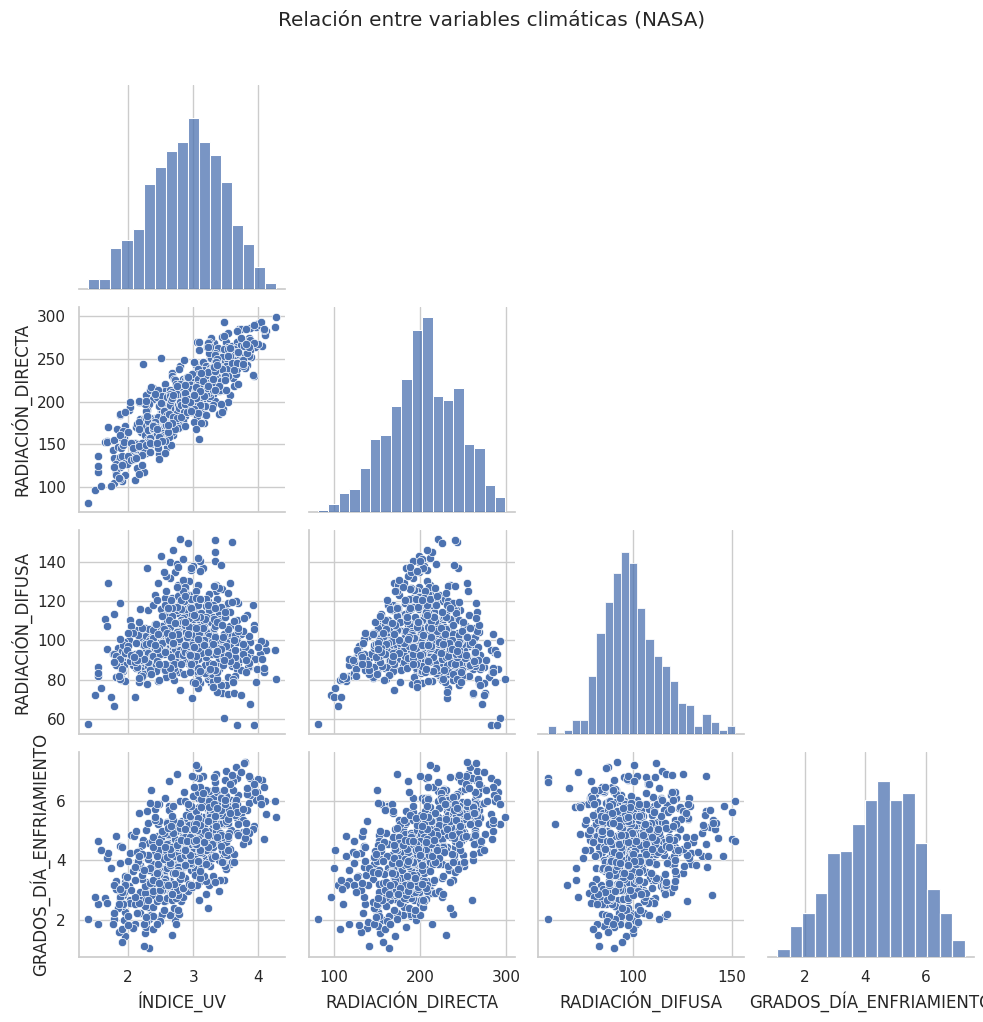

In [253]:
# =========================
# 📥 Cargar datos de energía y meteorología (NASA)
# =========================

# Columnas relevantes con nombres originales
columnas_nasa = [
    'YEAR', 'MO', 'DY',
    'ALLSKY_SFC_UV_INDEX',
    'ALLSKY_SFC_SW_DWN',
    'ALLSKY_SFC_SW_DIFF',
    'CDD18_3'
]

# Cargar datasets
data_energy = pd.read_csv(url_datosgov)
data_nasa = pd.read_csv(url_daraNasa, skiprows=13, names=columnas_nasa)

# Renombrar columnas a español
data_nasa.rename(columns={
    'YEAR': 'AÑO',
    'MO': 'MES',
    'DY': 'DÍA',
    'ALLSKY_SFC_UV_INDEX': 'ÍNDICE_UV',
    'ALLSKY_SFC_SW_DWN': 'RADIACIÓN_DIRECTA',
    'ALLSKY_SFC_SW_DIFF': 'RADIACIÓN_DIFUSA',
    'CDD18_3': 'GRADOS_DÍA_ENFRIAMIENTO'
}, inplace=True)

# =========================
# 🧹 Limpieza y preparación
# =========================

data_nasa.replace(-999, np.nan, inplace=True)
data_nasa.dropna(inplace=True)

data_nasa[['AÑO', 'MES', 'DÍA']] = data_nasa[['AÑO', 'MES', 'DÍA']].astype(int)
data_nasa[['ÍNDICE_UV', 'RADIACIÓN_DIRECTA', 'RADIACIÓN_DIFUSA', 'GRADOS_DÍA_ENFRIAMIENTO']] = \
    data_nasa[['ÍNDICE_UV', 'RADIACIÓN_DIRECTA', 'RADIACIÓN_DIFUSA', 'GRADOS_DÍA_ENFRIAMIENTO']].astype(float)

data_nasa['fecha'] = pd.to_datetime(data_nasa[['AÑO', 'MES', 'DÍA']].astype(str).agg('-'.join, axis=1))

# =========================
# ⚙️ Preparar datos de energía de Risaralda
# =========================

data_energy_ris = data_energy[data_energy['Departamento'].str.upper() == 'RISARALDA'].copy()
data_energy_ris['Fecha estimada FPO'] = pd.to_datetime(data_energy_ris['Fecha estimada FPO'], errors='coerce')

print(f"\n📌 Proyectos energéticos en Risaralda: {data_energy_ris.shape[0]} proyectos")

# =========================
# 📊 Análisis cruzado NASA ↔ Energía
# =========================

promedios_anuales = data_nasa.groupby(data_nasa['fecha'].dt.year)[['RADIACIÓN_DIRECTA', 'GRADOS_DÍA_ENFRIAMIENTO']].mean()

capacidad_total = data_energy_ris['Capacidad'].sum()
energia_total = data_energy_ris['Energía [kWh/día]'].sum()

print("\n🔆 Promedios anuales de radiación solar y grados día de enfriamiento:")
print(promedios_anuales.rename(columns={
    'RADIACIÓN_DIRECTA': 'Radiación (W/m²)',
    'GRADOS_DÍA_ENFRIAMIENTO': 'Grados día de enfriamiento (°C)'
}).round(2))

print(f"\n⚙️ Capacidad instalada total en Risaralda: {capacidad_total:.2f} MW")
print(f"⚡ Energía diaria estimada total: {energia_total:,.0f} kWh/día")

# =========================
# 📈 Estadísticas descriptivas detalladas
# =========================

variables = ['ÍNDICE_UV', 'RADIACIÓN_DIRECTA', 'RADIACIÓN_DIFUSA', 'GRADOS_DÍA_ENFRIAMIENTO']
nombres = {
    'ÍNDICE_UV': 'Índice UV (valor diario)',
    'RADIACIÓN_DIRECTA': 'Radiación solar directa (W/m²)',
    'RADIACIÓN_DIFUSA': 'Radiación solar difusa (W/m²)',
    'GRADOS_DÍA_ENFRIAMIENTO': 'Grados día de enfriamiento (°C)'
}

print("\n📊 Estadísticas detalladas por variable climática:")
for col in variables:
    print(f"\n🔸 {nombres[col]}")
    print(f"   Media:       {data_nasa[col].mean():.2f}")
    print(f"   Mediana:     {data_nasa[col].median():.2f}")
    print(f"   Desviación:  {data_nasa[col].std():.2f}")
    print(f"   Varianza:    {data_nasa[col].var():.2f}")

# =========================
# 🔍 Visualización: Matriz de dispersión
# =========================

print("\n📊 Generando gráfico de relaciones entre variables (pairplot)...")
sns.set(style="whitegrid")
sns.pairplot(data_nasa[variables], corner=True)
plt.suptitle("Relación entre variables climáticas (NASA)", y=1.02)
plt.tight_layout()
plt.show()


In [254]:
# 2. Exploración inicial
# =====================================
# 🔍 EXPLORACIÓN INICIAL AVANZADA
# Documentacion para darle forma al codigo se encuentra en la libreriras de python
# https://docs.python.org/3/reference/lexical_analysis.html#f-strings
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
# =====================================

def exploracion_mejorada(df, nombre_fuente="Dataset"):
    """
    Realiza una exploración avanzada de un DataFrame con análisis estadísticos
    y visualizaciones clave para proyectos energéticos.

    Args:
        df (pd.DataFrame): DataFrame a analizar
        nombre_fuente (str): Nombre descriptivo de la fuente de datos
    """
    # Configuración inicial
    pd.set_option('display.float_format', '{:,.2f}'.format)
    print(f"\n{'='*80}\n🔍 EXPLORACIÓN AVANZADA: {nombre_fuente.upper()}\n{'='*80}")#otiene la fuente (tipo letra )

    # 1. Metadatos básicos
    # Imprime información básica sobre el DataFrame:
    # - Número total de filas (observaciones o registros)
    # - Número total de columnas (atributos o variables)
    print(f"\n📌 METADATOS [Filas: {df.shape[0]} | Columnas: {df.shape[1]}]")
    print(f"📊 Memoria usada: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB") #muestra el uso de memoria para detectar posibles desbordamientos

    # 2. Tipos de datos y completitud
    # Este bloque de código analiza los tipos de datos de cada columna,
    # cuenta los valores no nulos, calcula el porcentaje de completitud
    # y determina la cantidad de valores únicos por columna.

    # Se crea un nuevo DataFrame llamado 'tipos_df'.
    # Este DataFrame contendrá el resumen del análisis de los datos.
    tipos_df = pd.DataFrame({
        # 'Tipo': Se crea una columna en 'tipos_df' llamada 'Tipo'.
        # df.dtypes: Esto obtiene el tipo de dato de cada columna en el DataFrame original 'df'.
        'Tipo': df.dtypes,

        # 'No Nulos': Se crea una columna en 'tipos_df' llamada 'No Nulos'.
        # df.count(): Esto cuenta el número de valores no nulos (no NaN) en cada columna de 'df'.
        'No Nulos': df.count(),

        # '% Completitud': Se crea una columna para mostrar el porcentaje de valores no nulos.
        # df.count() / len(df): Calcula la proporción de valores no nulos dividiendo
        #                      el conteo de no nulos por el número total de filas (len(df)).
        # * 100: Multiplica la proporción por 100 para obtener un porcentaje.
        # .round(2): Redondea el porcentaje a 2 decimales.
        '% Completitud': (df.count() / len(df) * 100).round(2),

        # 'Valores Únicos': Se crea una columna para mostrar la cantidad de valores únicos.
        # df.nunique(): Esto cuenta el número de valores únicos en cada columna de 'df'.
        'Valores Únicos': df.nunique()
    })

    # Después de ejecutar este código, 'tipos_df' será un DataFrame
    # donde cada fila representa una columna del DataFrame original 'df',
    # y las columnas de 'tipos_df' ('Tipo', 'No Nulos', '% Completitud', 'Valores Únicos')
    # contendrán la información resumida para cada columna original.

    print("\n🧾 RESUMEN DE VARIABLES:")
    display(tipos_df)

    # 3. Análisis de variables numéricas
    # Selecciona solo las columnas numéricas del DataFrame
    # Detectar columnas numéricas automáticamente
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    if num_cols:
        print("\n🔢 ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS:")

        # Calcular estadísticas descriptivas
        estadisticas = df[num_cols].describe(percentiles=[.01, .25, .5, .75, .99]).T
        estadisticas['Rango IQR'] = estadisticas['75%'] - estadisticas['25%']
        estadisticas.rename(columns={
            'count': 'Conteo',
            'mean': 'Media',
            'std': 'Desviación estándar',
            'min': 'Mínimo',
            '1%': 'Percentil 1%',
            '25%': 'Cuartil Q1 (25%)',
            '50%': 'Mediana (50%)',
            '75%': 'Cuartil Q3 (75%)',
            '99%': 'Percentil 99%',
            'max': 'Máximo'
        }, inplace=True)

        display(estadisticas.round(2))

        # =========================
        # 🧪 Detección de valores atípicos por IQR
        # =========================
        print("\n⚠️ DETECCIÓN DE OUTLIERS (criterio IQR):")

        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1

        outliers_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
        conteo_outliers = outliers_mask.sum().to_frame(name='Total de Outliers')
        porcentaje_outliers = (conteo_outliers['Total de Outliers'] / len(df)) * 100
        conteo_outliers['% del total'] = porcentaje_outliers

        # Mostrar tabla ordenada por mayor cantidad de outliers
        display(conteo_outliers.sort_values(by='Total de Outliers', ascending=False).style.format({
            'Total de Outliers': '{:,.0f}',
            '% del total': '{:.1f}%'
        }))

    else:
        print("ℹ️ No se encontraron columnas numéricas para analizar.")

    # 4. Análisis de variables categóricas
    cat_cols = df.select_dtypes(exclude=np.number).columns
    if len(cat_cols) > 0:
        print("\n🔤 DISTRIBUCIÓN CATEGÓRICA:")
        for col in cat_cols:
            if df[col].nunique() < 20:
                print(f"\n📊 {col}:")
                display(df[col].value_counts(normalize=True).head(10))

    # 5. Visualizaciones clave para energía


# =====================================
# 🚀 EJECUCIÓN PARA DATOS CARGADOS
# =====================================
if 'data_dgov' in locals():
    print("\n" + "="*60)
    print("📊 ANÁLISIS DATOS.GOV.CO")
    print("="*60)
    exploracion_mejorada(data_dgov, "Datos Públicos Energía")



📊 ANÁLISIS DATOS.GOV.CO

🔍 EXPLORACIÓN AVANZADA: DATOS PÚBLICOS ENERGÍA

📌 METADATOS [Filas: 158 | Columnas: 13]
📊 Memoria usada: 0.07 MB

🧾 RESUMEN DE VARIABLES:


,Tipo,No Nulos,% Completitud,Valores Únicos
Proyecto,object,158,100.00,156
Tipo,object,158,100.00,2
Capacidad,float64,158,100.00,104
Departamento,object,158,100.00,26
Municipio,object,158,100.00,79
Código Departamento,int64,158,100.00,26
Código Municipio,int64,158,100.00,81
Fecha estimada FPO,object,158,100.00,70
Energía [kWh/día],int64,158,100.00,106
Usuarios,int64,158,100.00,106



🔢 ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS:


,Conteo,Media,Desviación estándar,Mínimo,Percentil 1%,Cuartil Q1 (25%),Mediana (50%),Cuartil Q3 (75%),Percentil 99%,Máximo,Rango IQR
Capacidad,158.00,37.97,78.07,0.01,0.04,2.28,9.90,20.75,258.60,700.00,18.48
Código Departamento,158.00,42.83,26.61,5.00,5.00,17.50,44.00,70.00,86.29,94.00,52.50
Código Municipio,158.00,"41,551.80","27,283.55",23.00,40.67,"13,675.50","44,847.00","68,514.75","86,541.23","94,001.00","54,839.25"
Energía [kWh/día],158.00,"231,296.03","507,038.54",21.00,102.72,"10,920.00","47,520.00","112,380.00","2,482,560.00","3,360,000.00","101,460.00"
Usuarios,158.00,"40,109.06","87,925.82",4.00,17.69,"1,893.75","8,240.00","19,487.75","430,501.85","582,659.00","17,594.00"
Inversión estimada [COP],158.00,"145,058,220,253.16","293,830,287,083.14","9,800,000.00","92,020,000.00","9,513,750,000.00","39,632,500,000.00","85,570,000,000.00","969,750,000,000.00","2,625,000,000,000.00","76,056,250,000.00"
Empleos estimados,158.00,221.61,485.17,0.00,0.00,16.00,69.00,144.25,"1,392.00","4,872.00",128.25
Emisiones CO2 [Ton/año],158.00,"67,538.46","148,055.23",6.00,29.96,"3,189.00","13,876.00","32,814.75","724,907.52","981,120.00","29,625.75"



⚠️ DETECCIÓN DE OUTLIERS (criterio IQR):


,Total de Outliers,% del total
Capacidad,33,20.9%
Energía [kWh/día],31,19.6%
Inversión estimada [COP],31,19.6%
Usuarios,31,19.6%
Emisiones CO2 [Ton/año],31,19.6%
Empleos estimados,30,19.0%
Código Municipio,0,0.0%
Código Departamento,0,0.0%



🔤 DISTRIBUCIÓN CATEGÓRICA:

📊 Tipo:


,proportion
Tipo,
Solar,0.92
Eólico,0.08



🔍 ANÁLISIS ENERGÉTICO FOCALIZADO: RISARALDA
📌 Total de proyectos identificados: 8

🔌 DISTRIBUCIÓN POR TIPO DE ENERGÍA:


,% Participación
Tipo,
Solar,100.00



💰 INVERSIÓN EN RISARALDA:


,sum,mean,count
Tipo,,,
Solar,"$29,799,000,000 COP","$3,724,875,000 COP",8



⚡ CAPACIDAD DE GENERACIÓN:


,sum,mean,count
Tipo,,,
Solar,6.93 MW,0.87 MW,8



📅 EVOLUCIÓN TEMPORAL DE PROYECTOS:


,Proyectos
Año,
2020,7
2021,1


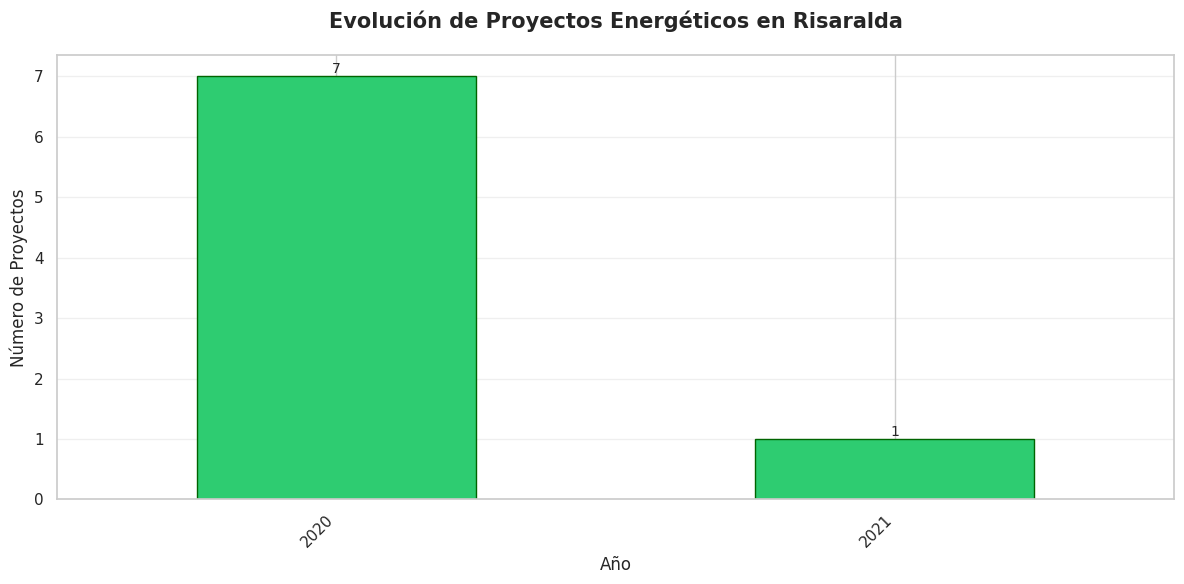


🏭 DISTRIBUCIÓN POR MUNICIPIOS:


,N° Proyectos
Municipio,
PEREIRA,8



👥 IMPACTO SOCIAL:


,Total
Empleos estimados,47.00
Usuarios,"5,768.00"
Empleos por proyecto,5.88
Usuarios por proyecto,721.00



🌱 REDUCCIÓN DE EMISIONES:
Total de emisiones evitadas: 9,712 Ton CO2/año
Equivalente a 10 hectáreas de bosque conservado


In [255]:
# =====================================
# 📌 FILTRADO PARA RISARALDA
# =====================================
def analizar_risaralda(df):
    """
    Filtra y analiza datos específicos para el departamento de Risaralda

    Args:
        df (pd.DataFrame): DataFrame con los datos energéticos nacionales
    """
    # Filtrar solo proyectos de Risaralda
    risaralda = df[df['Departamento'] == 'RISARALDA']

    if risaralda.empty:
        print("⚠️ No se encontraron proyectos registrados en Risaralda")
        return

    print(f"\n{'='*80}\n🔍 ANÁLISIS ENERGÉTICO FOCALIZADO: RISARALDA\n{'='*80}")
    print(f"📌 Total de proyectos identificados: {len(risaralda)}")

    # =====================================
    # 📊 ANÁLISIS POR TIPO DE ENERGÍA
    # =====================================
    print("\n🔌 DISTRIBUCIÓN POR TIPO DE ENERGÍA:")
    distribucion = risaralda['Tipo'].value_counts(normalize=True) * 100
    display(distribucion.to_frame('% Participación'))

    # =====================================
    # 💰 ANÁLISIS ECONÓMICO
    # =====================================
    print("\n💰 INVERSIÓN EN RISARALDA:")
    inversiones = risaralda.groupby('Tipo')['Inversión estimada [COP]'].agg(['sum', 'mean', 'count'])
    inversiones['sum'] = inversiones['sum'].apply(lambda x: f"${x:,.0f} COP")
    inversiones['mean'] = inversiones['mean'].apply(lambda x: f"${x:,.0f} COP")
    display(inversiones)

    # =====================================
    # ⚡ CAPACIDAD ENERGÉTICA
    # =====================================
    print("\n⚡ CAPACIDAD DE GENERACIÓN:")
    capacidad = risaralda.groupby('Tipo')['Capacidad'].agg(['sum', 'mean', 'count'])
    capacidad['sum'] = capacidad['sum'].apply(lambda x: f"{x:,.2f} MW")
    capacidad['mean'] = capacidad['mean'].apply(lambda x: f"{x:,.2f} MW")
    display(capacidad)

    # =====================================
    # 📅 ANÁLISIS TEMPORAL
    # =====================================
    if 'Fecha estimada FPO' in risaralda.columns:
        # Crear copia explícita para evitar el warning
        risaralda_temp = risaralda.copy()

        # Convertir fechas y extraer año
        risaralda_temp['Año'] = pd.to_datetime(risaralda_temp['Fecha estimada FPO']).dt.year

        print("\n📅 EVOLUCIÓN TEMPORAL DE PROYECTOS:")
        evolucion = risaralda_temp['Año'].value_counts().sort_index()
        display(evolucion.to_frame('Proyectos'))

        # Gráfico de evolución mejorado
        plt.figure(figsize=(12, 6))
        ax = evolucion.plot(kind='bar', color='#2ecc71', edgecolor='darkgreen')

        # Personalización del gráfico
        plt.title('Evolución de Proyectos Energéticos en Risaralda', pad=20, fontsize=15, fontweight='bold')
        plt.xlabel('Año', fontsize=12)
        plt.ylabel('Número de Proyectos', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # Añadir etiquetas de valor
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points',
                      fontsize=10)

        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    # =====================================
    # 🏭 TOP MUNICIPIOS
    # =====================================
    print("\n🏭 DISTRIBUCIÓN POR MUNICIPIOS:")
    top_municipios = risaralda['Municipio'].value_counts().head(10)
    display(top_municipios.to_frame('N° Proyectos'))

    # =====================================
    # 👥 IMPACTO SOCIAL
    # =====================================
    print("\n👥 IMPACTO SOCIAL:")
    impacto = risaralda[['Empleos estimados', 'Usuarios']].sum().to_frame('Total')
    impacto.loc['Empleos por proyecto'] = risaralda['Empleos estimados'].mean()
    impacto.loc['Usuarios por proyecto'] = risaralda['Usuarios'].mean()
    display(impacto)

    # =====================================
    # 🌱 IMPACTO AMBIENTAL
    # =====================================
    print("\n🌱 REDUCCIÓN DE EMISIONES:")
    co2 = risaralda['Emisiones CO2 [Ton/año]'].sum()
    print(f"Total de emisiones evitadas: {co2:,.0f} Ton CO2/año")
    print(f"Equivalente a {co2/1000:,.0f} hectáreas de bosque conservado")

# =====================================
# 🚀 EJECUCIÓN DEL ANÁLISIS
# =====================================
if 'data_dgov' in locals():
    analizar_risaralda(data_dgov)
else:
    print("No se encontraron datos energéticos cargados")



# 🔍 ANÁLISIS ENERGÉTICO FOCALIZADO: RISARALDA

---

## 📌 Total de proyectos identificados: **8**

---

## 🔌 Distribución por Tipo de Energía

| Tipo  | Participación (%) |
|-------|-------------------|
| Solar | **100.00**        |

Todos los proyectos energéticos registrados en Risaralda corresponden a generación solar fotovoltaica, lo que muestra una tendencia clara hacia este tipo de fuente de energía limpia y renovable.

---

## 💰 Inversión Total en Proyectos Solares

| Total Invertido      | Promedio por Proyecto | N° Proyectos |
|----------------------|-----------------------|--------------|
| **$29,799,000,000** COP | **$3,724,875,000** COP   | 8            |

Este nivel de inversión sugiere una apuesta por proyectos de **escala media**, orientados a cobertura local o institucional.

---

## ⚡ Capacidad Instalada

| Capacidad Total (MW) | Promedio por Proyecto | N° Proyectos |
|----------------------|-----------------------|--------------|
| **6.93 MW**          | **0.87 MW**           | 8            |

En comparación con los promedios nacionales, Risaralda presenta proyectos de **menor escala**, posiblemente de tipo comercial, educativo o institucional.

---

## 📅 Evolución Temporal de los Proyectos

| Año  | N° Proyectos |
|------|--------------|
| 2020 | 7            |
| 2021 | 1            |

El pico de implementación ocurrió en **2020**, posiblemente vinculado a incentivos tributarios o planes de desarrollo departamental.

---

## 🏭 Distribución por Municipio

| Municipio | N° Proyectos |
|-----------|--------------|
| PEREIRA   | 8            |

Todos los proyectos están localizados en **Pereira**, lo que evidencia una **alta concentración urbana** y un vacío de cobertura en municipios rurales.

---

## 👥 Impacto Social Estimado

| Indicador              | Valor Total | Promedio por Proyecto |
|------------------------|-------------|------------------------|
| Empleos estimados      | 47          | 5.88                   |
| Usuarios beneficiados  | 5,768       | 721.00                 |

Los proyectos han tenido un impacto social directo **moderado**, beneficiando a casi seis mil personas y generando empleo para 47 personas.

---

## 🌱 Reducción de Emisiones de CO₂

**Total de emisiones evitadas**: **9,712 Ton CO₂/año**

🟢 Esto equivale a conservar **aproximadamente 10 hectáreas de bosque tropical maduro cada año**, una contribución significativa al esfuerzo de mitigación del cambio climático en la región.

---

## 📌 Conclusiones clave:

- El departamento ha **apostado exclusivamente por energía solar**, lo que representa una buena dirección.
- **Falta diversificación geográfica**, ya que todos los proyectos están centralizados en Pereira.
- Existe **potencial de expansión rural** hacia municipios como Dosquebradas, La Virginia, Apía o Santa Rosa.
- Sería estratégico impulsar nuevos proyectos con **mayor impacto social y ambiental**, por ejemplo, cooperativas rurales de energía o plantas híbridas (solar + almacenamiento).

---

_📍 Este análisis se basa en los datos públicos registrados en Datos.gov.co a corte del año más reciente disponible._


In [256]:
# Cargar datos energía y NASA
# Definición de las columnas para el dataset de la NASA
# Estas son las variables que nos interesa extraer del archivo de la NASA
columnas_nasa = [
    'YEAR',        # Año de medición
    'MO',          # Mes de medición
    'DY',          # Día de medición
    'ALLSKY_SFC_UV_INDEX',  # Índice UV en superficie (cielo completo)
    'ALLSKY_SFC_SW_DWN',    # Radiación solar de onda corta incidente en superficie (cielo completo) - nuestra variable principal
    'ALLSKY_SFC_SW_DIFF',   # Componente difusa de la radiación solar
    'CDD18_3'      # Grados días de enfriamiento (base 18.3°C) - útil para análisis de demanda energética
]
data_energy = pd.read_csv(url_datosgov)
data_nasa = pd.read_csv(url_daraNasa, skiprows=13, names=columnas_nasa)

# =========================
# 🧹 Limpieza y preparación
# =========================
data_nasa.replace(-999, np.nan, inplace=True)
data_nasa.dropna(inplace=True)

# Convertir a tipos correctos
data_nasa[['YEAR', 'MO', 'DY']] = data_nasa[['YEAR', 'MO', 'DY']].astype(int)
data_nasa[['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']] = data_nasa[['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']].astype(float)

data_nasa['fecha'] = pd.to_datetime(data_nasa[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), errors='coerce')

# =========================
# ⚙️ Preparar datos energía (solo Risaralda)
# =========================
data_energy = pd.read_csv(url_datosgov)
data_energy_ris = data_energy[data_energy['Departamento'].str.upper() == 'RISARALDA'].copy()
data_energy_ris['Fecha estimada FPO'] = pd.to_datetime(data_energy_ris['Fecha estimada FPO'], errors='coerce')

print(f"📌 Proyectos energéticos en Risaralda: {data_energy_ris.shape[0]} proyectos")

# =========================
# 📊 Análisis cruzado
# =========================
# 📌 Agrupar los datos de NASA por año (extraído de la columna 'fecha')
# y calcular el promedio anual de dos variables clave:
# - 'ALLSKY_SFC_SW_DWN' → Radiación solar superficial diaria (W/m²)
# - 'CDD18_3' → Grados día de temperatura > 18.3°C (indicador de calor)
nasa_promedios = data_nasa.groupby(data_nasa['fecha'].dt.year)[['ALLSKY_SFC_SW_DWN', 'CDD18_3']].mean()

# ⚙️ Calcular la capacidad total instalada de los proyectos energéticos en Risaralda (MW)
capacidad_total = data_energy_ris['Capacidad'].sum()

# ⚡ Calcular el total estimado de energía diaria generada por esos proyectos (kWh/día)
energia_total = data_energy_ris['Energía [kWh/día]'].sum()

# 🔆 Mostrar en consola los promedios anuales de radiación solar y temperatura (resultado del agrupamiento)
print("\n🔆 Promedios anuales de radiación y temperatura:")
print(nasa_promedios)

# ⚙️ Mostrar en consola la capacidad total instalada en Risaralda en Megavatios (MW)
print(f"\n⚙️ Capacidad instalada en Risaralda: {capacidad_total:.2f} MW")

# ⚡ Mostrar en consola el total estimado de energía diaria generada en Risaralda (kWh/día)
print(f"⚡ Energía diaria estimada: {energia_total:,} kWh/día")



📌 Proyectos energéticos en Risaralda: 8 proyectos

🔆 Promedios anuales de radiación y temperatura:
       ALLSKY_SFC_SW_DWN  CDD18_3
fecha                            
2022              188.00     2.88
2023              204.77     4.41
2024              210.72     5.11

⚙️ Capacidad instalada en Risaralda: 6.93 MW
⚡ Energía diaria estimada: 33,264 kWh/día


In [257]:
# =========================
# 📈 Visualizaciones
# =========================

# se importa la libreria plotly.express as px para hacer los graficos
#https://plotly.com/python/plotly-express/

# Copiar el DataFrame para no afectar los datos originales
df_visualizacion = nasa_promedios.rename(columns={'ALLSKY_SFC_SW_DWN': 'Radiación_Solar'})

fig1 = px.line(df_visualizacion, y='Radiación_Solar',
               title='☀️ Radiación Solar Promedio Anual en Risaralda (W/m²)',
               labels={'Radiación_Solar': 'Radiación (W/m²)', 'fecha': 'Año'})

fig1.show()

fig2 = px.bar(data_energy_ris, x='Proyecto', y='Energía [kWh/día]', color='Tipo',
              title='🔋 Energía diaria estimada de proyectos en Risaralda')
fig2.show()

# =========================
# ✅ Interpretación
# =========================
print("\n💡 **Interpretación inicial:**")
print(f"""
- 🌞 Radiación media anual entre {nasa_promedios['ALLSKY_SFC_SW_DWN'].min():.2f} y {nasa_promedios['ALLSKY_SFC_SW_DWN'].max():.2f} W/m²
- 🌡️ Temperatura adecuada para rendimiento solar (CDD18_3 promedio ~{nasa_promedios['CDD18_3'].mean():.2f})
- ⚙️ Capacidad instalada actual: {capacidad_total:.2f} MW, con energía generada {energia_total:,} kWh/día
- 🔎 Potencial solar suficiente para expansión de proyectos residenciales solares
- 🏠 Viabilidad: **ALTA**, especialmente para generación distribuida en hogares rurales o no interconectados
""")


💡 **Interpretación inicial:**

- 🌞 Radiación media anual entre 188.00 y 210.72 W/m²
- 🌡️ Temperatura adecuada para rendimiento solar (CDD18_3 promedio ~4.13)
- ⚙️ Capacidad instalada actual: 6.93 MW, con energía generada 33,264 kWh/día
- 🔎 Potencial solar suficiente para expansión de proyectos residenciales solares
- 🏠 Viabilidad: **ALTA**, especialmente para generación distribuida en hogares rurales o no interconectados



la radiación ultravioleta (UV) puede penetrar bajo techo a través de ventanas, aunque en menor medida que al aire libre. Los rayos UVA, que son los que más penetran en la piel, pueden pasar hasta un 90% a través de ventanas. Por lo tanto, es importante protegerse de la radiación UV incluso dentro de casa, especialmente si se pasa mucho tiempo cerca de ventanas o se está expuesto a luz solar directa.
Explicación:
Penetración a través de ventanas:
Los cristales de las ventanas son vulnerables a la radiación UV, especialmente a los rayos UVA, que pueden pasar en gran medida.
Efectos de la radiación UV bajo techo:
La radiación UV, aunque reducida, puede contribuir al envejecimiento prematuro de la piel, la aparición de arrugas y, en casos más graves, al desarrollo de cáncer de piel.
Importancia de la protección:
Se recomienda usar protector solar incluso dentro de casa, especialmente si se pasa mucho tiempo cerca de ventanas o en espacios bien iluminados por el sol.